In [1]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential, load_model
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.mobilenet import preprocess_input

from keras.utils.generic_utils import CustomObjectScope
from keras.layers import DepthwiseConv2D
from keras_applications.mobilenet import relu6

import matplotlib.pyplot as plt
%matplotlib inline

/home/camilalm/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [17]:
with CustomObjectScope({'relu6': relu6,'DepthwiseConv2D': DepthwiseConv2D}):
    model = load_model('SLD_CNN.h5')

In [49]:
def preprocess_image(image, target_size):
    if image.mode != "L":
        image = image.convert("L")
    image = image.resize(target_size)
    plt.imshow(np.asarray(image))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    return image

def get_label(index):
    correct_label = [9, 0, 7, 6, 1, 8, 4, 3, 2, 5]
    return correct_label[index]

In [39]:
gray_image = load_img('./Examples/example_9.JPG',
                      target_size=(100, 100, 1),
                      grayscale=True)

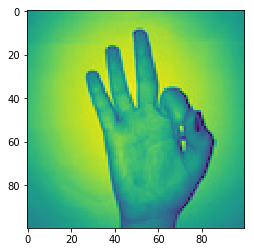

In [40]:
plt.imshow(np.asarray(gray_image))

In [41]:
gray_image = gray_image.resize((128,128))

In [42]:
x = img_to_array(gray_image)
x = np.expand_dims(x, 0)
print(x.shape)
x = preprocess_input(x)
y = model.predict(x, verbose=0)
y

(1, 128, 128, 1)


array([[0.27709505, 0.03492318, 0.10546371, 0.09215537, 0.02090001,
        0.28583768, 0.12092494, 0.02090001, 0.02090001, 0.02090001]],
      dtype=float32)

In [43]:
np.argmax(y)

5

In [44]:
get_label(np.argmax(y))

8

---

In [65]:
image = load_img('./Examples/example_9.JPG',
                      target_size=(100, 100, 1))

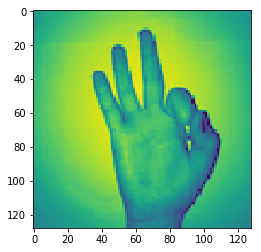

In [66]:
processed_image = preprocess_image(image, target_size=(128, 128))

In [67]:
processed_image = preprocess_input(processed_image)
prediction = model.predict(processed_image)

In [68]:
prediction

array([[0.27709505, 0.03492318, 0.10546371, 0.09215537, 0.02090001,
        0.28583768, 0.12092494, 0.02090001, 0.02090001, 0.02090001]],
      dtype=float32)

In [69]:
np.argmax(prediction)

5

In [70]:
get_label(np.argmax(prediction))

8

In [71]:
print(processed_image.shape)

(1, 128, 128, 1)
